In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import peakutils

In [54]:
feature_id = 7
precursor_id = 142150

In [55]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [58]:
ms2_region_feature_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/ms2-region-feature-{}-precursor-{}.csv'.format(feature_id, precursor_id))

In [59]:
ms2_region_feature_df.head()

,frame_id,mz,scan,intensity,point_id,retention_time_secs
0,39416,909.195846,331,9,1996,4233.481248
1,39416,192.795857,332,9,1997,4233.481248
2,39416,411.259657,332,50,1998,4233.481248
3,39416,267.163132,333,57,1999,4233.481248
4,39416,316.181893,333,22,2000,4233.481248


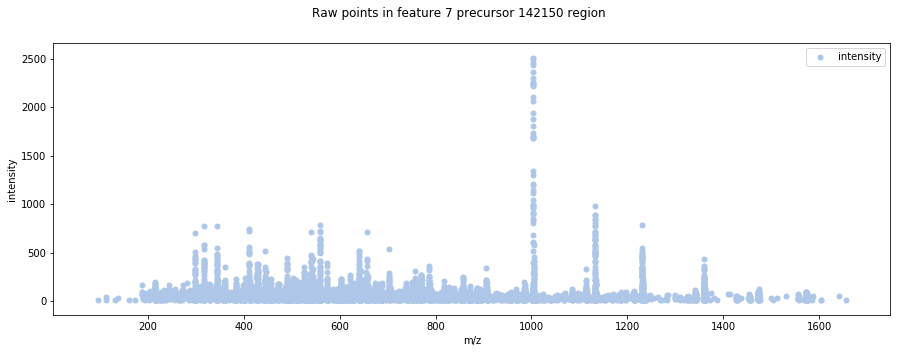

In [68]:
f, ax = plt.subplots()
ax.plot(ms2_region_feature_df.mz, ms2_region_feature_df.intensity, marker='o', color=tableau20[1], linestyle='', ms=5)
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
# plt.xlim(1000,1010)
plt.suptitle('Raw points in feature {} precursor {} region'.format(feature_id,precursor_id))
plt.margins(0.06)
plt.show()

In [64]:
db_name = '/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id,feature_id)
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks where precursor=={} order by centroid_mz".format(precursor_id), db_conn)
db_conn.close()

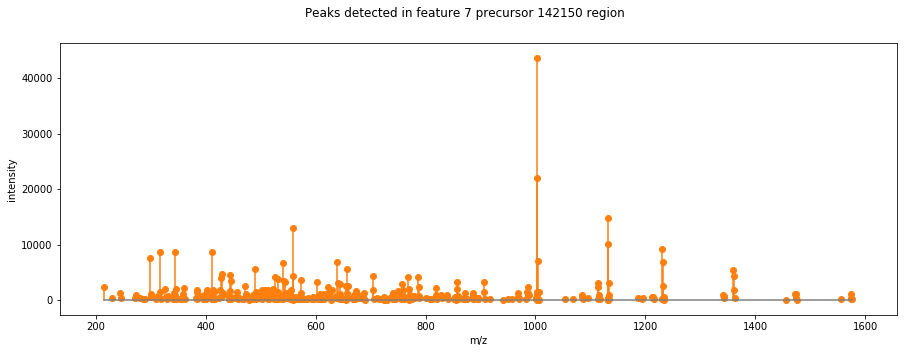

In [69]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(ms2_peaks_df.centroid_mz, ms2_peaks_df.intensity, linefmt="C1-", markerfmt="C1o", basefmt="C7-")
plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.xlim(1000,1010)
plt.margins(0.06)
plt.suptitle('Peaks detected in feature {} precursor {} region'.format(feature_id,precursor_id))
plt.show()